In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
from scipy.stats import chi2
import scipy.optimize as spo
import os
import os.path as path
import wget

In [3]:
path = "data_csv/Datos_"
colors = ["b","g","y","r"]

In [4]:
def GetRegression(x,y):
    m,b = np.polyfit(x,y,1)
    X = np.linspace(min(x),max(x),100)
    Y = m*X + b
    return X,Y,m,b

def GetUncertainty(m,b,x,y):
    Sum = np.sum((y - m*x - b)**2)
    N_2 = len(y)-2
    S_y = np.sqrt(Sum/N_2)
    N = len(y)
    denominator = N*np.sum(x**2) - (np.sum(x))**2
    S_m = S_y*np.sqrt(N/denominator)
    S_b = S_y*np.sqrt(np.sum(x**2)/denominator)
    un_M = S_m
    un_B =S_b
    return un_M,un_B

In [5]:
file = ["B","G","Y","R","IR"]
Data = [None,None,None,None,None]

In [6]:
for i in range(5):
    Data[i] = pd.read_csv(path+file[i]+".csv",sep=";")

In [7]:
I = [None,None,None,None,None]
V = [None,None,None,None,None]

I_err = np.ones(21)*0.25e-8
V_err = np.ones(21)*1e-3


for i in range(5):
    I[i] = np.flip(np.array(Data[i]["Intensidad"],dtype=float)*1e-8)
    V[i] = np.flip(np.array(Data[i]["Voltaje"],dtype=float))

[-5.08655212504856e-06, -2.6699320978921806e-06, -4.931281931134557e-07, -6.920602441639692e-07] [4.0456078026095715e-06, 1.8351674565001964e-06, 2.3520485995646782e-07, 2.1167845513659206e-07]


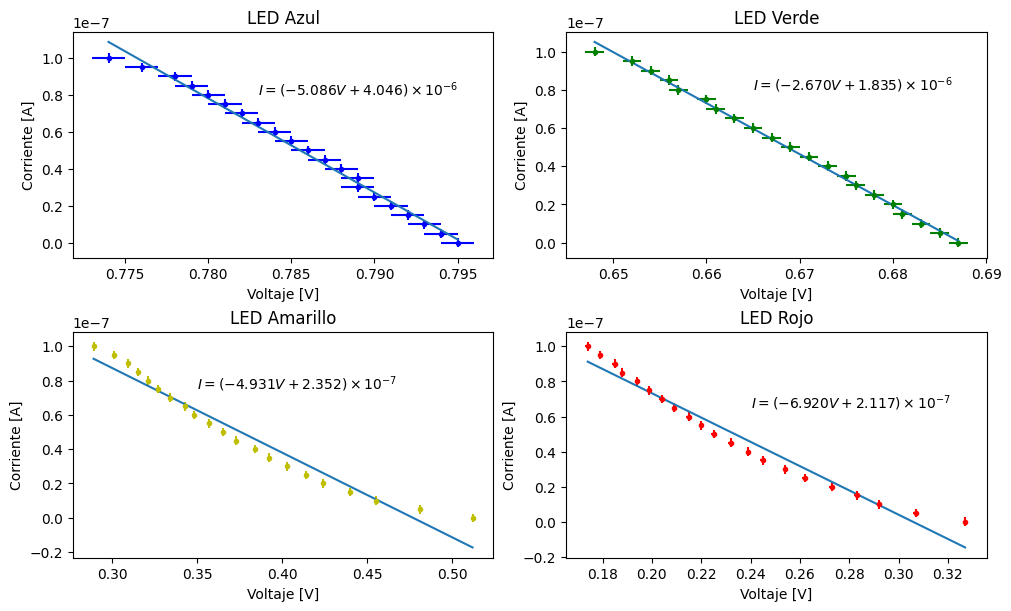

In [8]:
fig, axs = plt.subplots(2,2,figsize=(10,6),constrained_layout=True)
M,B = [0,0,0,0],[0,0,0,0]
V_frenado = np.array([])
wave_lenght = np.array([469,567,590,659])
wlen = wave_lenght*1e-9

for i in range(4):
    X,Y,M[i],B[i] = GetRegression(V[i],I[i])
    plt.subplot(221+i)
    plt.errorbar(V[i],I[i],color=colors[i],yerr=I_err,xerr=V_err,fmt=".")
    plt.plot(X,Y)
    V_frenado = np.append(V_frenado,-B[i]/M[i])
    plt.xlabel("Voltaje [V]")
    plt.ylabel("Corriente [A]")
    
axs[0,0].set_title("LED Azul")
axs[0,0].text(0.783,0.8e-7,r"$I = (-5.086V + 4.046)\times 10^{-6}$")
axs[0,1].set_title("LED Verde")
axs[0,1].text(0.665,0.8e-7,r"$I = (-2.670V + 1.835)\times 10^{-6}$")
axs[1,0].set_title("LED Amarillo")
axs[1,0].text(0.35,0.75e-7,r"$I = (-4.931V + 2.352)\times 10^{-7}$")
axs[1,1].set_title("LED Rojo")
axs[1,1].text(0.24,0.65e-7,r"$I = (-6.920V + 2.117)\times 10^{-7}$")

print(M,B)

plt.show()

(1.2958649987495525e-34, 6.958260875949826e-20)

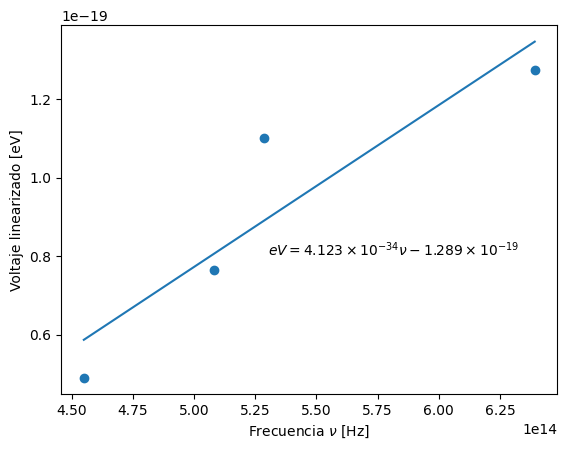

In [9]:
e = 1.60217663e-19
c = 2.99792458e8
frequency =c/wlen
plt.scatter(frequency,e*V_frenado)
plt.xlabel(r"Frecuencia $\nu$ [Hz]")
plt.ylabel(r"Voltaje linearizado [eV]")
plt.text(5.3e14,0.8e-19,r"$eV = 4.123\times10^{-34}\nu - 1.289\times10^{-19}$")
X,Y,m,b = GetRegression(frequency,e*V_frenado)
plt.plot(X,Y)

GetUncertainty(m,b,frequency,e*V_frenado)


(-6.525072758199166e-07, 1.870575996972215e-07)

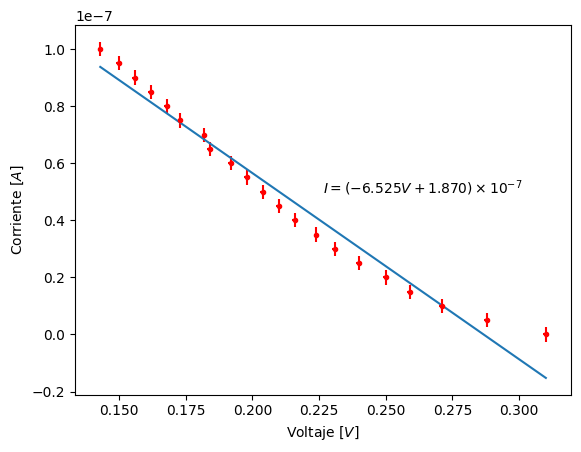

In [10]:
plt.errorbar(V[4],I[4],color="r",yerr=I_err,fmt=".",xerr=V_err)
plt.xlabel(r"Voltaje [$V$]")
plt.ylabel(r"Corriente [$A$]")

X,Y,m,b = GetRegression(V[4],I[4])
x = np.linspace(min(X),max(X))
y = m*x + b
plt.plot(x,y)
plt.text(np.mean(X),np.mean(Y)+0.1e-7,r"$I = (-6.525 V + 1.870)\times10^{-7} $")
m,b